In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import statistics as sts
import numpy as np
import seaborn as sns
import pickle
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, silhouette_score
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
def plot_confusion_matrix(matrix):
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                    matrix.flatten()]
    
    group_percentages = ["{0:.2%}".format(value) for value in
                         matrix.flatten()/np.sum(matrix)]
    
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names, group_counts, group_percentages)]
    
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(matrix, annot=labels, fmt='', cmap='Blues')
    plt.show()

### Load Graph Dataset

In [ ]:
graph_df = pd.read_csv('https://raw.githubusercontent.com/viniciusmioto/network_analysis/main/data/graph_db.csv')

In [ ]:
graph_df.head()

,graph_type,clustering_coef,first_quartile,second_quartile,third_quartile,max_triangles,max_degree,qtd_max_degree,min_degree,qtd_min_degree,avg_degree,density,is_power_law
0,amzn,0.417681,8.0,10.0,13.0,3423,2752,1,1,11627,12.114251,0.000030,1
1,amzn,0.419780,5.0,6.0,7.0,520,420,1,1,6069,6.865732,0.000026,1
2,amzn,0.402235,7.0,10.0,13.0,3118,2747,1,1,18254,11.728029,0.000029,1
3,amzn,0.406396,7.0,10.0,13.0,2994,2760,1,1,19410,11.892847,0.000029,1
4,amzn,0.728760,3.0,4.0,6.0,238877,62166,1,1,28104,8.208201,0.000026,1


In [ ]:
graph_df.describe()

,clustering_coef,first_quartile,second_quartile,third_quartile,max_triangles,max_degree,qtd_max_degree,min_degree,qtd_min_degree,avg_degree,density,is_power_law
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,9.900000e+01,99.000000
mean,7.557130,5.530303,9.797980,18.828283,17568.010101,3742.121212,2.484848,1.333333,21415.656566,16.896765,3.181533e-02,0.525253
std,72.842041,12.362059,20.442917,37.190640,52596.873026,8766.969232,13.459966,0.699854,99659.157948,31.755194,6.216307e-02,0.501903
min,0.000000,1.000000,1.000000,1.000000,0.000000,3.000000,1.000000,0.000000,1.000000,1.334006,9.427309e-07,0.000000
25%,0.000000,1.000000,2.500000,4.000000,0.000000,39.000000,1.000000,1.000000,23.000000,4.408866,2.708631e-04,0.000000
50%,0.010868,2.000000,3.000000,7.000000,8.000000,150.000000,1.000000,1.000000,1492.000000,6.844652,8.138505e-04,1.000000
75%,0.585894,4.000000,7.500000,14.000000,11032.500000,2511.500000,1.000000,1.000000,5906.500000,14.132723,2.735161e-02,1.000000
max,725.000000,80.000000,120.500000,216.000000,343898.000000,62166.000000,135.000000,3.000000,849885.000000,172.981529,3.509615e-01,1.000000


### Separate Features (X) and Labels (y) 

In [ ]:
# separating features and labels
df_features = graph_df.drop(['is_power_law'], 1)
X = np.array(df_features.copy().drop(['graph_type'], 1))
y = np.array(graph_df['is_power_law'])

### Features Correlation

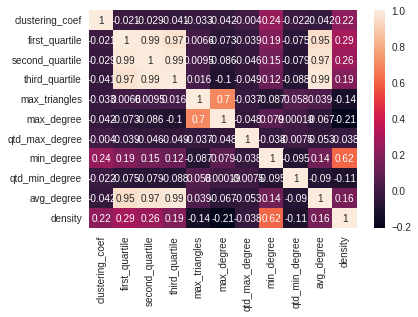

In [ ]:
features_df = df_features.drop(['graph_type'], 1)
sns.heatmap(features_df.corr(), annot=True)

In [ ]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

# K-Means

## Number of Clusters: **2**

### Create and Fit KMeans Model

In [ ]:
kmeans = KMeans(n_clusters=2, n_init=30)
y_pred = kmeans.fit_predict(scaled_X)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

### Group Percentage

prediction division

In [ ]:
print('Group A: ', sum(y_pred)/len(y_pred))
print('Group B: ', 1 - sum(y_pred)/len(y_pred))

Group A:  0.9494949494949495
Group B:  0.0505050505050505


real percentage of power-law (dataset)

In [ ]:
sum(y)/len(y)

0.5252525252525253

### Score

In [ ]:
silhouette_score(scaled_X, kmeans.labels_)

0.6914766304507216

First Type

## Finding the Best Number of Clusters

### Silhouette Visualizer

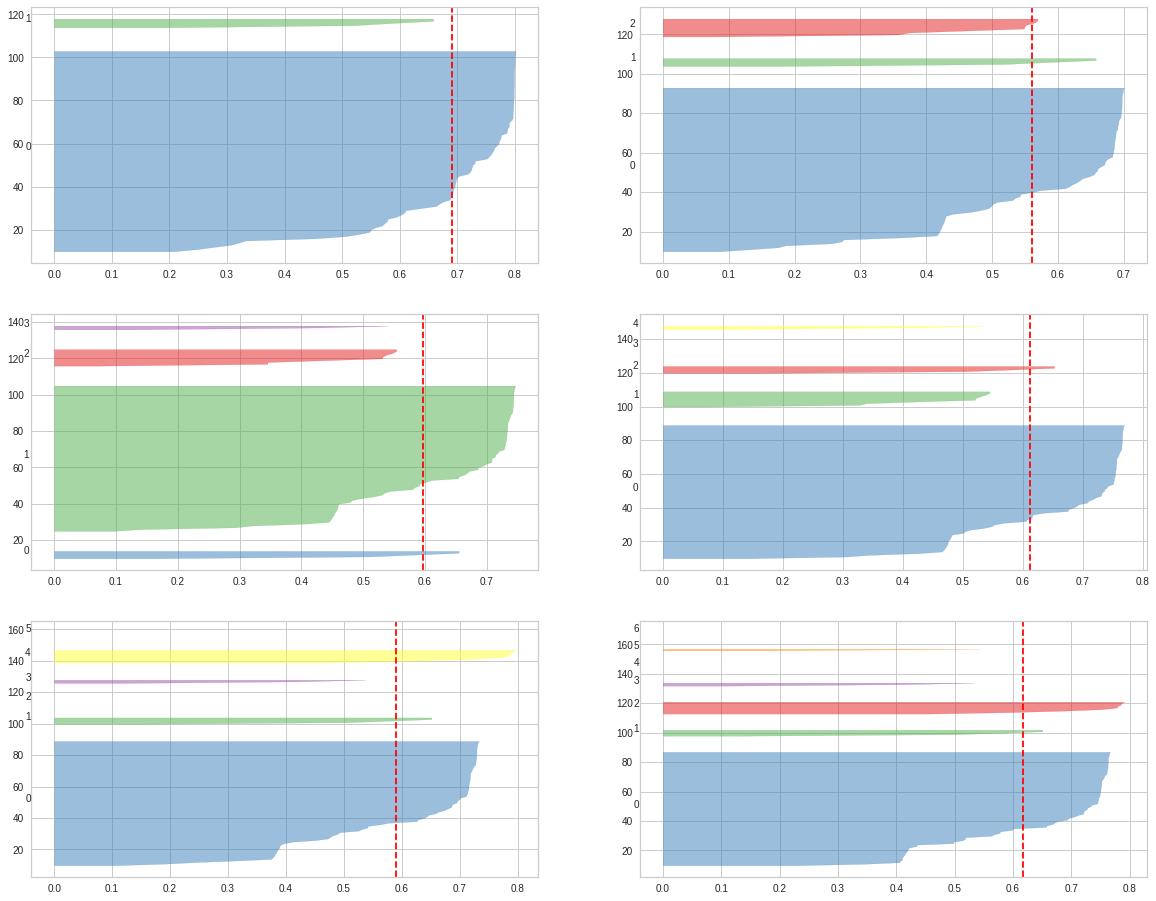

In [ ]:
fig, ax = plt.subplots(3, 2, figsize=(20,16))
sscore = [] 
for i in [2, 3, 4, 5, 6, 7]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i)
    q, mod = divmod(i, 2)

    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(scaled_X)
    sscore.append(silhouette_score(scaled_X, km.labels_))

In [ ]:
sscore

[0.6914766304507216,
 0.5612299870178236,
 0.5965729947939103,
 0.6120839820266942,
 0.5897526668382235,
 0.6175280115074191]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


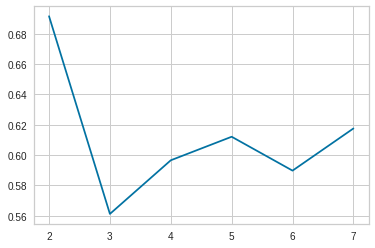

In [ ]:
sns.lineplot([2, 3, 4, 5, 6, 7], sscore)
plt.show()

## Getting the Graph Type

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


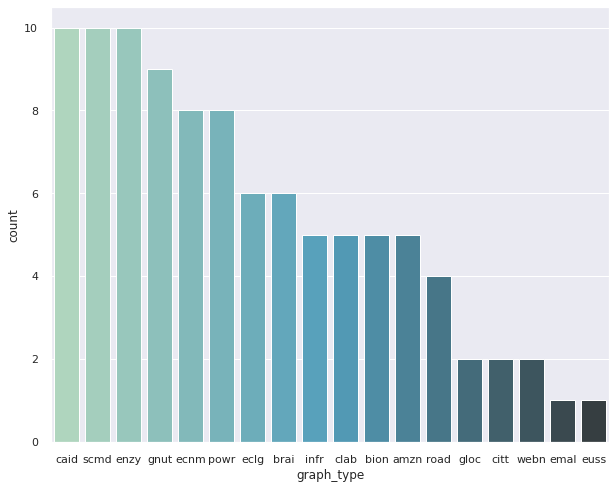

In [ ]:
sns.set(rc={'figure.figsize':(10, 8)}) #width=10, height=8
ax = sns.countplot(graph_df['graph_type'], 
                   order = graph_df['graph_type'].value_counts().index, 
                   palette = 'GnBu_d')

## How Did the Cluster Separate the Graphs?

## 2 Clusters

In [ ]:
cluster_pred_df = graph_df.copy()
cluster_pred_df['prediction'] = y_pred
cluster_pred_df

,graph_type,clustering_coef,first_quartile,second_quartile,third_quartile,max_triangles,max_degree,qtd_max_degree,min_degree,qtd_min_degree,avg_degree,density,is_power_law,prediction
0,amzn,0.417681,8.0,10.0,13.0,3423,2752,1,1,11627,12.114251,0.000030,1,1
1,amzn,0.419780,5.0,6.0,7.0,520,420,1,1,6069,6.865732,0.000026,1,1
2,amzn,0.402235,7.0,10.0,13.0,3118,2747,1,1,18254,11.728029,0.000029,1,1
3,amzn,0.406396,7.0,10.0,13.0,2994,2760,1,1,19410,11.892847,0.000029,1,1
4,amzn,0.728760,3.0,4.0,6.0,238877,62166,1,1,28104,8.208201,0.000026,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,powr,0.000000,1.0,1.0,2.0,0,19,1,1,3492,1.894828,0.000272,0,1
95,road,0.000000,3.0,3.0,4.0,0,33,1,1,10,4.927536,0.072464,0,1
96,road,0.000000,1.0,1.0,2.0,0,9,1,1,1407,1.429148,0.000721,0,1
97,road,0.010947,1.0,2.0,3.0,5,8,1,1,459626,1.882545,0.000002,0,1


In [ ]:
cluster_pred_df[['graph_type', 'prediction']].value_counts()

graph_type  prediction
caid        1             10
enzy        1             10
scmd        1             10
gnut        1              9
powr        1              8
eclg        1              6
amzn        1              5
bion        1              5
infr        1              5
brai        1              5
clab        1              5
ecnm        1              4
            0              4
road        1              4
citt        1              2
gloc        1              2
webn        1              2
emal        1              1
euss        1              1
brai        0              1
dtype: int64

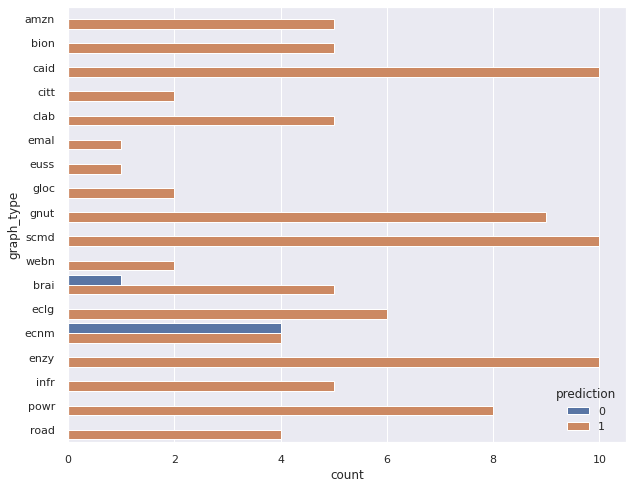

In [ ]:
sns.set(rc={'figure.figsize':(10, 8)}) #width=10, height=8
ax = sns.countplot(y='graph_type', hue='prediction', data=cluster_pred_df)

## 3 Clusters

In [ ]:
kmeans_3 = KMeans(n_clusters=3)
y_pred_3 = kmeans_3.fit_predict(scaled_X)
cluster_pred_3_df = graph_df.copy()
cluster_pred_3_df['prediction_3'] = y_pred_3
cluster_pred_3_df

,graph_type,clustering_coef,first_quartile,second_quartile,third_quartile,max_triangles,max_degree,qtd_max_degree,min_degree,qtd_min_degree,avg_degree,density,is_power_law,prediction_3
0,amzn,0.417681,8.0,10.0,13.0,3423,2752,1,1,11627,12.114251,0.000030,1,0
1,amzn,0.419780,5.0,6.0,7.0,520,420,1,1,6069,6.865732,0.000026,1,0
2,amzn,0.402235,7.0,10.0,13.0,3118,2747,1,1,18254,11.728029,0.000029,1,0
3,amzn,0.406396,7.0,10.0,13.0,2994,2760,1,1,19410,11.892847,0.000029,1,0
4,amzn,0.728760,3.0,4.0,6.0,238877,62166,1,1,28104,8.208201,0.000026,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,powr,0.000000,1.0,1.0,2.0,0,19,1,1,3492,1.894828,0.000272,0,0
95,road,0.000000,3.0,3.0,4.0,0,33,1,1,10,4.927536,0.072464,0,0
96,road,0.000000,1.0,1.0,2.0,0,9,1,1,1407,1.429148,0.000721,0,0
97,road,0.010947,1.0,2.0,3.0,5,8,1,1,459626,1.882545,0.000002,0,0


In [ ]:
cluster_pred_3_df[['graph_type', 'prediction_3']].value_counts()

graph_type  prediction_3
caid        0               10
scmd        0               10
gnut        0                9
enzy        1                9
powr        0                8
eclg        0                6
amzn        0                5
bion        0                5
infr        0                5
clab        0                5
ecnm        0                4
brai        0                4
ecnm        2                4
road        0                4
citt        0                2
gloc        0                2
webn        0                2
emal        0                1
enzy        0                1
euss        0                1
brai        2                1
            1                1
dtype: int64

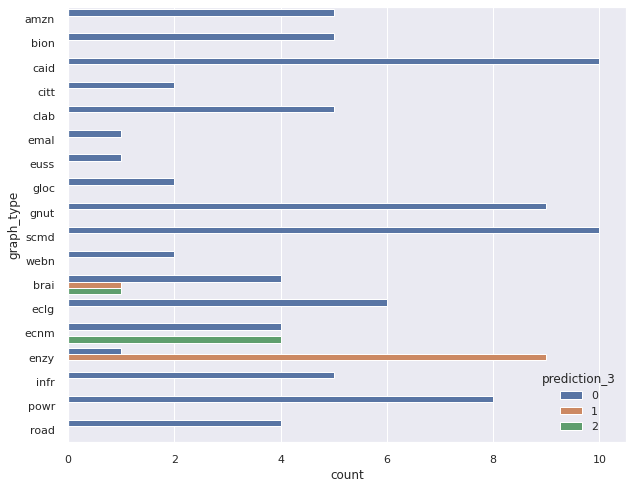

In [ ]:
sns.set(rc={'figure.figsize':(10, 8)}) #width=10, height=8
ax = sns.countplot(y='graph_type', hue='prediction_3', data=cluster_pred_3_df)

### 4 Clusters

In [ ]:
kmeans_4 = KMeans(n_clusters=4)
y_pred_4 = kmeans_4.fit_predict(scaled_X)

In [ ]:
cluster_pred_4_df = graph_df.copy()
cluster_pred_4_df['prediction_4'] = y_pred_4
cluster_pred_4_df

,graph_type,clustering_coef,first_quartile,second_quartile,third_quartile,max_triangles,max_degree,qtd_max_degree,min_degree,qtd_min_degree,avg_degree,density,is_power_law,prediction_4
0,amzn,0.417681,8.0,10.0,13.0,3423,2752,1,1,11627,12.114251,0.000030,1,0
1,amzn,0.419780,5.0,6.0,7.0,520,420,1,1,6069,6.865732,0.000026,1,0
2,amzn,0.402235,7.0,10.0,13.0,3118,2747,1,1,18254,11.728029,0.000029,1,0
3,amzn,0.406396,7.0,10.0,13.0,2994,2760,1,1,19410,11.892847,0.000029,1,0
4,amzn,0.728760,3.0,4.0,6.0,238877,62166,1,1,28104,8.208201,0.000026,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,powr,0.000000,1.0,1.0,2.0,0,19,1,1,3492,1.894828,0.000272,0,0
95,road,0.000000,3.0,3.0,4.0,0,33,1,1,10,4.927536,0.072464,0,0
96,road,0.000000,1.0,1.0,2.0,0,9,1,1,1407,1.429148,0.000721,0,0
97,road,0.010947,1.0,2.0,3.0,5,8,1,1,459626,1.882545,0.000002,0,0


In [ ]:
cluster_pred_4_df[['graph_type', 'prediction_4']].value_counts()

graph_type  prediction_4
caid        0               10
scmd        0               10
gnut        0                9
enzy        3                9
powr        0                8
eclg        0                6
bion        0                5
infr        0                5
clab        0                5
ecnm        1                4
            0                4
brai        0                4
amzn        0                4
road        0                4
citt        0                2
gloc        0                2
webn        2                2
emal        0                1
enzy        0                1
euss        0                1
brai        3                1
            1                1
amzn        2                1
dtype: int64

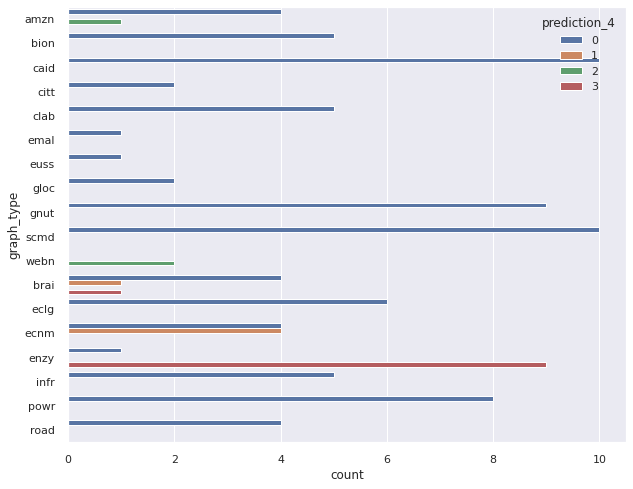

In [ ]:
sns.set(rc={'figure.figsize':(10, 8)}) #width=10, height=8
ax = sns.countplot(y='graph_type', hue='prediction_4', data=cluster_pred_4_df)

### 6 Clusters

In [ ]:
kmeans_6 = KMeans(n_clusters=6)
y_pred_6 = kmeans_6.fit_predict(scaled_X)

In [ ]:
cluster_pred_6_df = graph_df.copy()
cluster_pred_6_df['prediction_6'] = y_pred_6
cluster_pred_6_df

,graph_type,clustering_coef,first_quartile,second_quartile,third_quartile,max_triangles,max_degree,qtd_max_degree,min_degree,qtd_min_degree,avg_degree,density,is_power_law,prediction_6
0,amzn,0.417681,8.0,10.0,13.0,3423,2752,1,1,11627,12.114251,0.000030,1,0
1,amzn,0.419780,5.0,6.0,7.0,520,420,1,1,6069,6.865732,0.000026,1,0
2,amzn,0.402235,7.0,10.0,13.0,3118,2747,1,1,18254,11.728029,0.000029,1,0
3,amzn,0.406396,7.0,10.0,13.0,2994,2760,1,1,19410,11.892847,0.000029,1,0
4,amzn,0.728760,3.0,4.0,6.0,238877,62166,1,1,28104,8.208201,0.000026,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,powr,0.000000,1.0,1.0,2.0,0,19,1,1,3492,1.894828,0.000272,0,0
95,road,0.000000,3.0,3.0,4.0,0,33,1,1,10,4.927536,0.072464,0,0
96,road,0.000000,1.0,1.0,2.0,0,9,1,1,1407,1.429148,0.000721,0,0
97,road,0.010947,1.0,2.0,3.0,5,8,1,1,459626,1.882545,0.000002,0,0


In [ ]:
cluster_pred_6_df[['graph_type', 'prediction_6']].value_counts()

graph_type  prediction_6
caid        0               10
scmd        0               10
gnut        0                9
powr        0                8
enzy        1                8
eclg        0                6
bion        0                5
infr        0                5
clab        0                5
amzn        0                4
brai        0                4
ecnm        2                4
            0                4
road        0                3
citt        0                2
webn        3                2
gloc        0                2
enzy        0                1
            4                1
euss        0                1
brai        2                1
            1                1
road        5                1
amzn        3                1
emal        0                1
dtype: int64

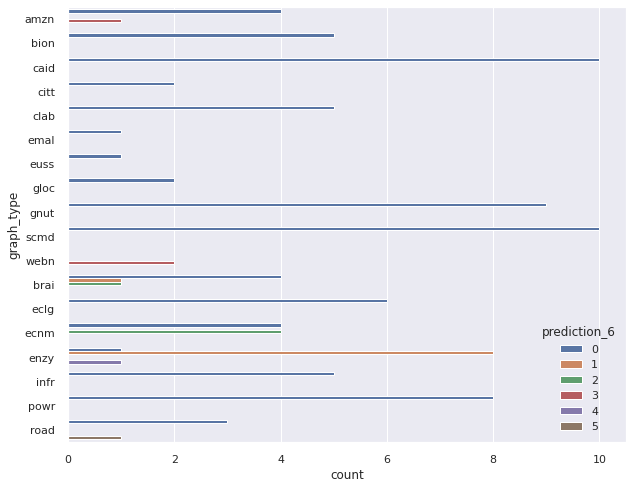

In [ ]:
sns.set(rc={'figure.figsize':(10, 8)}) #width=10, height=8
ax = sns.countplot(y='graph_type', hue='prediction_6', data=cluster_pred_6_df)

# DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(scaled_X)

DBSCAN(algorithm='auto', eps=0.05, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [ ]:
dbscan.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,  0,
        0,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1,  1,
       -1, -1, -1,  1, -1,  1,  1, -1, -1,  1, -1,  1, -1, -1])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


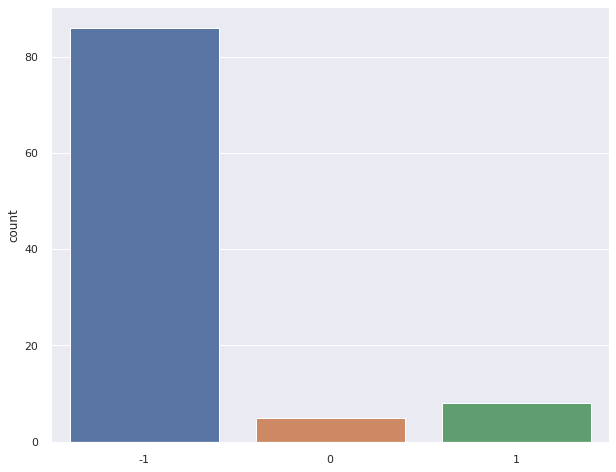

In [ ]:
sns.countplot(dbscan.labels_)

In [ ]:
dbscan_pred_df = graph_df.copy()
dbscan_pred_df['dbscan_pred'] = dbscan.labels_
dbscan_pred_df

,graph_type,clustering_coef,first_quartile,second_quartile,third_quartile,max_triangles,max_degree,qtd_max_degree,min_degree,qtd_min_degree,avg_degree,density,is_power_law,dbscan_pred
0,amzn,0.417681,8.0,10.0,13.0,3423,2752,1,1,11627,12.114251,0.000030,1,-1
1,amzn,0.419780,5.0,6.0,7.0,520,420,1,1,6069,6.865732,0.000026,1,-1
2,amzn,0.402235,7.0,10.0,13.0,3118,2747,1,1,18254,11.728029,0.000029,1,-1
3,amzn,0.406396,7.0,10.0,13.0,2994,2760,1,1,19410,11.892847,0.000029,1,-1
4,amzn,0.728760,3.0,4.0,6.0,238877,62166,1,1,28104,8.208201,0.000026,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,powr,0.000000,1.0,1.0,2.0,0,19,1,1,3492,1.894828,0.000272,0,1
95,road,0.000000,3.0,3.0,4.0,0,33,1,1,10,4.927536,0.072464,0,-1
96,road,0.000000,1.0,1.0,2.0,0,9,1,1,1407,1.429148,0.000721,0,1
97,road,0.010947,1.0,2.0,3.0,5,8,1,1,459626,1.882545,0.000002,0,-1


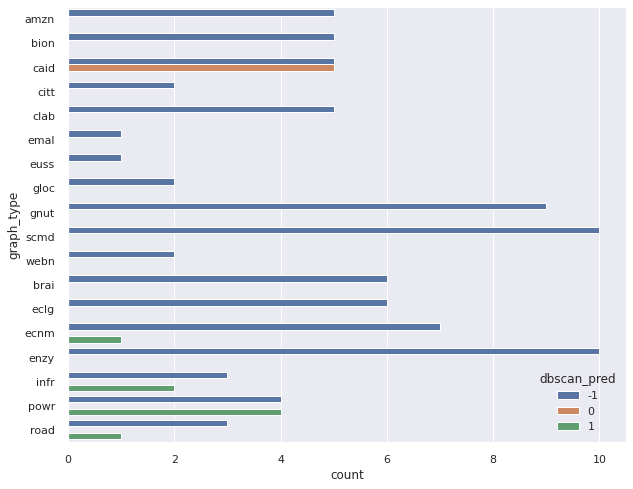

In [ ]:
sns.set(rc={'figure.figsize':(10, 8)}) #width=10, height=8
ax = sns.countplot(y='graph_type', hue='dbscan_pred', data=dbscan_pred_df)